In [1]:
alice = 'bathrooom toilet clogged drain mold leaks'
bob = 'air-conditioning AC heating cooling vents air'
chun = 'appliances dishwashers washer drier repair'

In [ ]:
import nltk

from nltk.tokenize import word_tokenize


import gensim
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [ ]:
def wordset(raw_text):
  tokenized = word_tokenize(raw_text.lower())
  return set(tokenized)

  return pd.DataFrame.from_dict(word_dict)

In [ ]:
nltk.download('punkt')


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def find_cosine(vec1, vec2):
  unit_vec1 = vec1/np.linalg.norm(vec1)
  unit_vec2 = vec2/np.linalg.norm(vec2)
  return np.dot(unit_vec1,unit_vec2)

def find_avg_vector(txt, embedding):
  words = word_tokenize(txt)
  vec_sum = None
  count = 0
  for word in words:
    if word in embedding:
      count += 1
      if vec_sum is not None:
        vec_sum += embedding[word]
      else:
        vec_sum = embedding[word].copy()
  if vec_sum is None:
    return pd.Series(np.zeros((300,)))  
  return pd.Series(vec_sum/count)

In [ ]:
def forward(text, wv):
    # Create vectors for each associate
    alice_vec = find_avg_vector(alice, wv)
    bob_vec = find_avg_vector(bob, wv)
    chun_vec = find_avg_vector(chun, wv)
    text_vec = find_avg_vector(text, wv)  # Create an average vector for the text input ^(creates vector for the people)

    if find_cosine(alice_vec, text_vec) > find_cosine(bob_vec, text_vec) and find_cosine(alice_vec, text_vec) > find_cosine(chun_vec, text_vec):
        return "alice@hhh.com"
    if find_cosine(bob_vec, text_vec) > find_cosine(alice_vec, text_vec) and find_cosine(bob_vec, text_vec) > find_cosine(chun_vec, text_vec):
        return "bob@hhh.com"
    if find_cosine(chun_vec, text_vec) > find_cosine(alice_vec, text_vec) and find_cosine(chun_vec, text_vec) > find_cosine(bob_vec, text_vec):
        return "chun@hhh.com"

    # Ties
    if find_cosine(alice_vec, text_vec) == find_cosine(bob_vec, text_vec) and find_cosine(alice_vec, text_vec) > find_cosine(chun_vec, text_vec):
        return "alice@hhh.com"
    if find_cosine(bob_vec, text_vec) == find_cosine(alice_vec, text_vec) and find_cosine(bob_vec, text_vec) > find_cosine(chun_vec, text_vec):
        return "bob@hhh.com"
    if find_cosine(chun_vec, text_vec) == find_cosine(alice_vec, text_vec) and find_cosine(chun_vec, text_vec) > find_cosine(bob_vec, text_vec):
        return "chun@hhh.com"



In [ ]:
# Test1: Expect 'alice@hhh.com'
test1 = "Tried a plunger and no luck.  Help!"
forward(test1, wv)

'alice@hhh.com'

In [ ]:
#Test2: Expect 'bob@hhh.com'
test2 = "So hot - I think the thermostat is busted..."
forward(test2, wv)

'bob@hhh.com'

In [ ]:
#Test3: Expect 'chun@hhh.com'
test3 = "I need to fix my dishwasher - suds flood the kitchen every time I run it"
forward(test3, wv)

'chun@hhh.com'

The following y values represent the average price of a gallon of milk for each year. (Source: https://www.usinflationcalculator.com/inflation/milk-prices-adjusted-for-inflation/) Perform linear regression.  Then plot the points alongside the linear fit.  And finally, make a prediction for 2023 with this linear model.

In [ ]:
import numpy as np
x = np.linspace(1995, 2021, 27)
y = [2.48, 2.62, 2.61, 2.70, 2.84,
     2.78, 2.88, 2.76, 2.76, 3.16, 3.19, 3.08, 3.50, 3.80, 3.11,
     3.26, 3.57, 3.49, 3.46, 3.69, 3.42, 3.20, 3.23, 2.90, 3.04,
     3.32, 3.55]

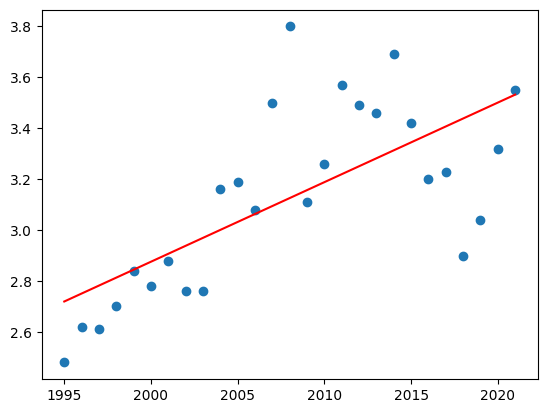

In [ ]:
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
x = x.reshape(-1,1)
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,y_hat,'r')
plt.show()


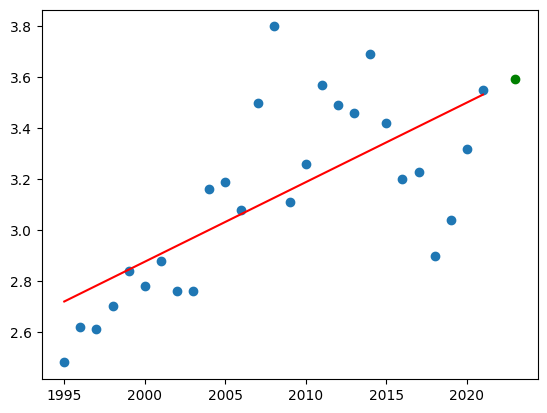

In [ ]:
# TODO: Prediction for 2023
x_pred = np.array([[2023]])
y_pred = model.predict(x_pred)
plt.scatter(2023, y_pred, color="green", label="Prediction for 2023")  # Plot the prediction for 2023

linear_model = LinearRegression()
x = x.reshape(-1,1)
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,y_hat,'r')
plt.show()


# Problem 4:  Project 
The goal of this notebook on cleaning and normalizing the raw dataset from the survey

This project will be presented infront of the class, 
-  Key points are how the data was cleaned, 
    -  IE removing trailing spaces, junk entries, improper formating and more
-  This project could also be used to educate workers about salary and benfit expectations for a specific field, country or experince level. 


In [ ]:
!kaggle datasets download -d parulpandey/2020-it-salary-surveZZy-for-eu-region
!unzip 2020-it-salary-survey-for-eu-region.zip -d /content/


In [ ]:
import pandas as pd

df_2020 = pd.read_csv('IT Salary Survey EU  2020.csv')
df_2019 = pd.read_csv('T Salary Survey EU 2019.csv')
df_2018 = pd.read_csv('IT Salary Survey EU 2018.csv')

print("2020 DataFrame loaded with", len(df_2020), "rows and these columns:")
print(df_2020.columns)
print("\n2019 DataFrame loaded with", len(df_2019), "rows and these columns:")
print(df_2019.columns)
print("\n2018 DataFrame loaded with", len(df_2018), "rows and these columns:")
print(df_2018.columns)

columns_2020 = set(df_2020.columns)
columns_2019 = set(df_2019.columns)
columns_2018 = set(df_2018.columns)

shared_columns = columns_2020 & columns_2019 & columns_2018
print("\nShared columns across all three files:")
print(shared_columns)

unique_columns_2020 = columns_2020 - shared_columns
unique_columns_2019 = columns_2019 - shared_columns
unique_columns_2018 = columns_2018 - shared_columns

print("\nUnique columns in 2020 file:", unique_columns_2020)
print("Unique columns in 2019 file:", unique_columns_2019)
print("Unique columns in 2018 file:", unique_columns_2018)
print("\nNumber of rows in each DataFrame:")
print("2020:", len(df_2020))
print("2019:", len(df_2019))
print("2018:", len(df_2018))
#I think im going to just use the 2020 data set because they have some conflicting columns and 2020 has the most rows out of all of them
df_testing=df_2020  #i used this tester var to see what graphs might look like later on between years of experince and worker benfits but it didnt work how I wished it would...
df=df_2020
df.head()

2020 DataFrame loaded with 1253 rows and these columns:
Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from you

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [ ]:
columns_2020 = set(df_2020.columns)

print("\nNumber of rows in DataFrame:")
print("2020:", len(df_2020))
missing_percentage = (df.isnull().sum() / len(df_2020)) * 100
print(f'missing percentage 2020 \n{missing_percentage}')
print(df.dtypes)
df.columns = df.columns.str.rstrip()


Number of rows in DataFrame:
2020: 1253
missing percentage 2020 
Timestamp                                                                                                                   0.000000
Age                                                                                                                         2.154828
Gender                                                                                                                      0.798085
City                                                                                                                        0.000000
Position                                                                                                                    0.478851
Total years of experience                                                                                                   1.276935
Years of experience in Germany                                                                                              2.553871
Sen

In [ ]:
df['Total years of experience'] = pd.to_numeric(df['Total years of experience'], errors='coerce')
print("\nNumber of NaN values in 'Total years of experience' after conversion:", df['Total years of experience'].isna().sum())
df = df.dropna(subset=['Total years of experience'])
df['Total years of experience'] = df['Total years of experience'].astype(float)
print("\nData type of 'Total years of experience':", df['Total years of experience'].dtype)
df[['Total years of experience']].head()
#cleaning years of experience (it was an object before)



Number of NaN values in 'Total years of experience' after conversion: 23

Data type of 'Total years of experience': float64


<ipython-input-70-2819983f0c26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total years of experience'] = df['Total years of experience'].astype(float)


,Total years of experience
0,5.0
1,7.0
2,12.0
3,4.0
4,17.0


In [ ]:
print("Range of 'Total years of experience':")
print("Min:", df['Total years of experience'].min(), "Max:", df['Total years of experience'].max())

print("\nRange of 'Yearly brutto salary (without bonus and stocks) in EUR':")
print("Min:", df['Yearly brutto salary (without bonus and stocks) in EUR'].min(),
      "Max:", df['Yearly brutto salary (without bonus and stocks) in EUR'].max())


Range of 'Total years of experience':
Min: 0.0 Max: 383.0

Range of 'Yearly brutto salary (without bonus and stocks) in EUR':
Min: 10001.0 Max: 500000000.0


In [ ]:
df_sorted_experience = df.sort_values(by='Total years of experience')

df_sorted_salary = df.nlargest(10, 'Yearly brutto salary (without bonus and stocks) in EUR', keep='first')
df_sorted_salary.head()
df = df_sorted_experience.iloc[3:-3]
df = df.sort_values(by='Yearly brutto salary (without bonus and stocks) in EUR').iloc[3:-3]
df = df.reset_index(drop=True)
df.head()
#when looking at the data set on kaggle I noticed there was some exeptionaly high values that are likely not to be correct to I am culling the highest and lowest 3 of each catagory



,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,26/11/2020 14:37:05,27.0,Male,Bucharest,QA Engineer,1.0,0,Junior,Javascript,Javascript / Typescript,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/12/2020 22:10:37,24.0,Male,Berlin,ML Engineer,0.8,0.2,Junior,Python,Python,...,NaN,24,Werkstudent,Temporary contract,English,11-50,Consulting / Agency,No,NaN,NaN
2,25/11/2020 19:06:21,25.0,Female,Hamburg,working student (QA),1.0,1,Student,Ruby,"Java / Scala, SQL",...,0,12,working student,Temporary contract,English,1000+,Product,No,NaN,NaN
3,24/11/2020 18:50:50,30.0,Male,Samara,Backend Developer,2.0,0,Middle,php,"PHP, Javascript / Typescript, SQL",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24/11/2020 19:12:16,30.0,Male,Moscow,Backend Developer,2.0,NaN,Middle,Python,"Python, SQL, Docker",...,NaN,28,Full-time employee,Unlimited contract,Russian,51-100,Startup,No,NaN,NaN


In [ ]:
print("Range of 'Total years of experience':")
print("Min:", df['Total years of experience'].min(), "Max:", df['Total years of experience'].max())

print("\nRange of 'Yearly brutto salary (without bonus and stocks) in EUR':")
print("Min:", df['Yearly brutto salary (without bonus and stocks) in EUR'].min(),
      "Max:", df['Yearly brutto salary (without bonus and stocks) in EUR'].max())


Range of 'Total years of experience':
Min: 0.0 Max: 30.0

Range of 'Yearly brutto salary (without bonus and stocks) in EUR':
Min: 11000.0 Max: 250000.0


In [ ]:
df = df[['Total years of experience', 'City', 'Yearly brutto salary (without bonus and stocks) in EUR']]
df.head()

,Total years of experience,City,Yearly brutto salary (without bonus and stocks) in EUR
0,1.0,Bucharest,11000.0
1,0.8,Berlin,11500.0
2,1.0,Hamburg,12000.0
3,2.0,Samara,12000.0
4,2.0,Moscow,13000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

scaler = StandardScaler()

df['Total years of experience'] = scaler.fit_transform(df[['Total years of experience']])

df.head()

,Total years of experience,City,Yearly brutto salary (without bonus and stocks) in EUR
0,-1.512793,14,11000.0
1,-1.551727,5,11500.0
2,-1.512793,40,12000.0
3,-1.318122,94,12000.0
4,-1.318122,75,13000.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.select_dtypes(include='number')
X = X.drop(columns=['Yearly brutto salary (without bonus and stocks) in EUR'])
y = df['Yearly brutto salary (without bonus and stocks) in EUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1096, 2)
X_test shape: (122, 2)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42,verbose=0)
random_forest_regressor.fit(X_train, y_train)


In [ ]:
y_pred = random_forest_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

random_forest_regressor.score(X_test, y_test)



0.1233681720967148

In [ ]:
# TODO variation 2
regressor_depth_variation_1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
regressor_depth_variation_1.fit(X_train, y_train)
regressor_depth_variation_1.score(X_test, y_test)
#I dont think its overfitting because this isnt that significant of an improvement

0.13205281750125408

In [ ]:
# TODO variation 3
regressor_depth_variation_2 = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
regressor_depth_variation_2.fit(X_train, y_train)
regressor_depth_variation_2.score(X_test, y_test)
#i tried numbers 1-10 and it seems that 3 has the most change, does this mean that it is over fitting? im not sure, because it goes back down the higher you go...

0.19310281044704591

In [ ]:
# TODO

import matplotlib.pyplot as plt
import numpy as np

feature_importances = regressor_depth_variation_2.feature_importances_

features = X_train.columns

indices = np.argsort(feature_importances)[::-1]


f'left num is the importance of year of experince right is the importance of the city {feature_importances}'


'left num is the experince right is the city [0.88949969 0.11050031]'

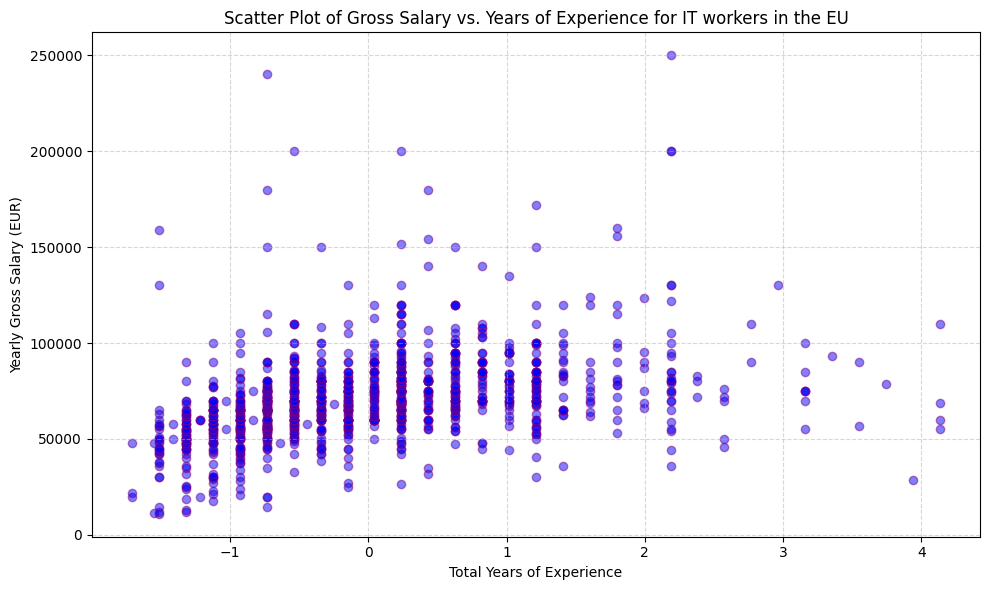

In [ ]:
import matplotlib.pyplot as plt

experience = df['Total years of experience']
salary = df['Yearly brutto salary (without bonus and stocks) in EUR']

plt.figure(figsize=(10, 6))
plt.scatter(experience, salary, alpha=0.5, c='blue', edgecolor='purple')
plt.xlabel('Total Years of Experience')
plt.ylabel('Yearly Gross Salary (EUR)')
plt.title('Scatter Plot of Gross Salary vs. Years of Experience for IT workers in the EU')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


**Findings**

Some interesting findings that I noticed are, as experience increases, workers do not necessarily get paid substantially more than others with less experience. I failed to consider the type of work they were doing, which might be a more accurate determinant of compensation differences. Also, I realized that because this study is based in the EU, there tends to be less a focus on salary and more on worker demands. As a result, more senior employees may not receive higher wages but instead will receive greater bonuses and vacation days. If I were to repeat this project, I would focus more on the benefits employees receive. And would hope to create a database that if queried could help a prospective worker understand what to expect if relocating to the EU. 


